In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors.regression import KNeighborsRegressor

## <font color=blue>01 Introduction to the data set</font> 
*  Read __imports-85.data__ ([data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names)) into a dataframe named __cars__. If you read in the file using [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) without specifying any additional parameter values, you'll notice that the column names don't match the ones in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). Why do you think this is and how can you fix this?
*  Determine which columns are numeric and can be used as features and which column is the target column.
*  Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [2]:
headers=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
         'body_style','drive_wheels','engine_location','wheel_base','length','width',
        'height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system',
        'bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg',
        'price']
cars = pd.read_csv('imports-85.data.txt', names=headers)

# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
print(numeric_cars.info())
numeric_cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB
None


,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


## <font color=blue>02 Data Cleaning</font>
*  Use the [DataFrame.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) method to replace all of the __?__ values with the __numpy.nan__ missing value.
*  Because __?__ is a string value, columns containing this value were cast to the pandas __object__ data type (instead of a numeric type like __int__ or __float__). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the [DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) or the [Series.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) methods to convert column types.
*  Return the number of rows that have a missing value for the __normalized-losses__ column. Determine how you should handle this column. You could:
  *  Replace the missing values using the average values from that column.
  *  Drop the rows entirely (especially if other columns in those rows have missing values).
  *  Drop the column entirely.
*  Explore the missing value counts for the other numeric columns and handle any missing values.
*  Of the columns you decided to keep, normalize the numeric ones so all values range from __0__ to __1__.

### Mein Kampf (my lame attmept at humor)...
##### Good thing no one is ever going to see this code but me.
I struggled quite a bit with this section.  Somehow when I was cleaning my dataset I ended up with 201 entires, 0 to 204.  Which meant I had 3 empty rows *(I think)*; I'm still trying to make sence of it.  Take a look a the cell below with the __FinalDataCheck__ tag.  It resulted in the following exception: __ValueError: Input contains NaN, infinity or a value too large for dtype('float64')__  when I was trying to fit the data.  I was given some great help from the stackoverflow community, see this [stackoverflow thread](https://stackoverflow.com/questions/49042340/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat64).  I believe the problem originated in the __dropna_price__ cell, however, I'm still not positive yet.  The line of code in question is shown here:

> numeric_cars.dropna(subset=['price'], inplace=True)


The explaination I was offered does an excellent job of describing what occured when I was cleaning my data that created the problem.  Here's the quote:
> The code from the question has two problems that I see, one of them is that you are using directly pandas dataframes, when you do that and pass them to knn, it will try to operate with the dataframe or series directly. If you debug the code and check the dataframe.shape, you will see something like (201,) instead of (201,1) that you would expect. That could cause some trouble sometimes, so it is recommended that you use df.values.reshape(-1,1). values will transform them to numpy arrays, and reshape will make sure the shape of the array has 1 column and the -1 makes sure the rest are rows.  The other problem is related to the data cleaning you did, it will remove some rows, as you pointed out, 3 of them, actually, but the index are still there, when you use permutation, python still finds them and then uses the index, that are the 'nan' that you removed previously. Another solution would be to reindex your dataframe so you make sure this does not happens, as an additional sanitization step, I didn't try it, though. – OscarD

However, it does not explain how I can remove those 3 empty indexes.  That is somthing I'm going to pursue in the near future.  The short term fix is, as @OscarD recommended, to comment out the following lines of code:

> \# Randomly resorts the DataFrame to mitiate sampling bias

> np.random.seed(1)

>df = df.loc[np.random.permutation(len(df))]

The trouble with this solution, is it introduces sampling bias into my analysis.  This is not satisfactory to me, and as I said, I definately intend to circle back to this and figure out how to remove those 3 empty indexes.


I have come to learn that his problem can be completely avoided by using this code to randomize the data set.  I've also found that I don't really have to worry about resizing the data set __in this case__.
> \# Randomly resorts the DataFrame to mitiate sampling bias

> np.random.seed(1)

> shuffled_index = np.random.permutation(df.index)

> df = df.reindex(shuffled_index)

In [3]:
# Convert missing values (?) with np.NaN then set the type to float
numeric_cars.replace(to_replace='?', value=np.nan, inplace=True)
numeric_cars = numeric_cars.astype('float')
print(numeric_cars.info())
numeric_cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB
None


,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN


In [4]:
# Show the percentage of values in each column that are not numberic.

not_numeric_count = len(numeric_cars) - numeric_cars.count(axis=0, level=None, numeric_only=False)
percentage_not_numeric = (not_numeric_count / len(numeric_cars)) * 100
percentage_not_numeric

normalized_losses    20.00000
wheel_base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb_weight           0.00000
bore                  1.95122
stroke                1.95122
compression_ratio     0.00000
horsepower            0.97561
peak_rpm              0.97561
city_mpg              0.00000
highway_mpg           0.00000
price                 1.95122
dtype: float64

In [5]:
# Because the column we're trying to predict is 'price', any row were price is NaN will be removed.
# After doing check the DataFrame again
numeric_cars.dropna(subset=['price'], inplace=True)
print(numeric_cars.isnull().sum())
print('\n')
numeric_cars.info()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float6

In [6]:
# All remaining NaN's will be filled with the mean of its respective column
# Then, yet again check the DataFrame.

numeric_cars = numeric_cars.fillna(numeric_cars.mean())
print(numeric_cars.isnull().sum())
print('\n')
numeric_cars.info()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price       

In [7]:
# Create training feature list and k value list
training_features = numeric_cars.columns.tolist()
predictive_feature = 'price'
training_features.remove(predictive_feature)

# Normalize columns
numeric_cars_normalized = numeric_cars[training_features].copy()
numeric_cars_normalized = (numeric_cars_normalized - numeric_cars_normalized.min()) / (numeric_cars_normalized.max() - numeric_cars_normalized.min())
numeric_cars_normalized[predictive_feature] = numeric_cars[predictive_feature].copy()

numeric_cars_normalized.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## <font color=blue>03 Univariate Model</font>
*  Create a function, named __knn_train_test()__ that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
  *  This function should split the data set into a training and test set.
  *  Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
  *  Finally, it should calculate the RMSE and return that value.
*  Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default __k__ value?
*  Modify the __knn_train_test()__ function you wrote to accept a parameter for the __k__ value.
  *  Update the function logic to use this parameter.
  *  For each numeric column, create, train, and test a univariate model using the following __k__ values (__1 - 21__). Visualize the results using a scatter plot and a line plot.

In [8]:
def knn_train_test_default_k(df, train_columns, predict_column):
    # instantiate KNeighborRegrssor object
    knn = KNeighborsRegressor()
    
    # Randomly resorts the DataFrame to mitiate sampling bias
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Split the DataFrame into ~50% train / 50% test data sets
    split_integer = round(len(df) * 0.50)
    train_df = df.iloc[0:split_integer]
    test_df = df.iloc[split_integer:]
    
    # Reshape the data set to ensure the shape of the array has 1 column and the -1 makes sure the rest are rows
    train_features = train_df[train_columns].values.reshape(-1, 1)
    train_target = train_df[predict_column].values.reshape(-1, 1)
    test_features = test_df[train_columns].values.reshape(-1, 1)
    
    # Fit the KNN model using the default k value.
    knn.fit(train_features, train_target)
    
    # Make predictions using model.
    predictions = knn.predict(test_features)
    
    # Calculate and return root mean square error.
    mse = mean_squared_error(y_true=test_df[predict_column], y_pred=predictions)
    return np.sqrt(mse)

In [9]:
# For each of the training feature (cols) train a model and 
# add resulting RMSE to a pd.Series to easily display the results
rmse_knn_default_k = {}
for col in training_features:
    rmse = knn_train_test_default_k(df=numeric_cars_normalized, train_columns=col, predict_column=predictive_feature)
    rmse_knn_default_k[col] = rmse

rmse_knn_default_k_df = pd.Series(rmse_knn_default_k)
rmse_knn_default_k_df.sort_values(inplace=True)
rmse_knn_default_k_df

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [10]:
def univariate_knn_train_test_eval_k(df, train_columns, predict_column, k_values):
    
    # Randomly resorts the DataFrame to mitiate sampling bias
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Split the DataFrame into ~50% train / 50% test data sets
    split_integer = round(len(df) * 0.50)
    train_df = df.iloc[0:split_integer]
    test_df = df.iloc[split_integer:]
    
    # Define the train_target data set 
    train_target = train_df[predict_column]
    
    
    # Loop through k values an obtain RMSE's for all k's and training cols
    
    rmse_dict = {}
    
    for col in train_columns:
        
        rmse_lst = []
        
        for k in k_values:

            # Define the train_features & test_features data sets 
            train_features = train_df[[col]]
            test_features = test_df[[col]]
    
            # instantiate KNeighborRegrssor object
            knn = KNeighborsRegressor(n_neighbors=k)
    
            # Fit the KNN model using the default k value.
            knn.fit(train_features, train_target)
    
            # Make predictions using model.
            predictions = knn.predict(test_features)
    
            # Calculate and append the root mean square error.
            mse = mean_squared_error(y_true=test_df[predict_column], y_pred=predictions)
            rmse_lst.append(np.sqrt(mse))
            
        rmse_dict[col] = rmse_lst
    
    return rmse_dict

In [11]:
def plot_RMSE_k_value_eval(training_features, k_values, rmse_dict, title, 
            legend_h_offset = 1.35, legend_v_offset=1.09, x_axis_title='k Values'):
    matplotlib.rc('legend', fontsize=16)
    fig = plt.figure(figsize=(12,20))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    ax1.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.3,21)))
    ax2.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.3,21)))

    for i, feature in enumerate(training_features):
        ax1.scatter(x=k_values, y=rmse_dict[feature], label=feature)
        ax2.plot(k_values, rmse_dict[feature], label=feature)

    # ax1.legend(loc='center right', bbox_to_anchor=(1.35, 1.5))
    ax1.set_xlabel(x_axis_title)
    ax1.set_ylabel('Mean Squared Error') 
    ax1.set_xticks(k_values)
    ax1.set_title(title)
    ax1.set_facecolor("#f2f4f7")

    ax2.legend(loc='center right', bbox_to_anchor=(legend_h_offset, legend_v_offset))
    ax2.set_xlabel(x_axis_title)
    ax2.set_ylabel('Mean Squared Error') 
    ax2.set_xticks(k_values)
    ax2.set_title(title)
    ax2.set_facecolor("#f2f4f7")
    
    plt.show()

In [12]:
ks = [k for k in range(1,10) if k/2 != int(k/2)]

rmse_univariate_k_eval = univariate_knn_train_test_eval_k(df=numeric_cars_normalized, 
            train_columns=training_features, predict_column=predictive_feature, k_values=ks)
rmse_univariate_k_eval_df = pd.DataFrame(rmse_univariate_k_eval)
rmse_univariate_k_eval_df

,bore,city_mpg,compression_ratio,curb_weight,height,highway_mpg,horsepower,length,normalized_losses,peak_rpm,stroke,wheel_base,width
0,8602.588485,5901.143574,8087.205347,5264.290231,8904.046456,6025.594967,4170.054848,4628.455501,7846.750605,9511.480068,9116.495955,4493.734069,4559.257298
1,6984.239489,4646.746409,7375.063686,5022.318012,8277.609643,4617.305020,4020.849263,5129.835821,7500.569812,8537.550900,7338.684670,5120.161506,4606.413692
2,6780.627785,4766.422505,6610.812153,4401.118255,8144.441043,4630.026799,4037.037713,5427.200961,7330.197653,7697.459696,8006.529545,5461.553998,4704.482590
3,6878.097966,5232.523034,6732.801283,4330.608104,7679.598124,4796.061440,4353.811860,5313.427721,7756.421586,7510.294160,7803.937797,5448.107051,4571.485046
4,6866.808502,5465.209493,7024.485525,4632.044474,7811.036063,5278.358057,4515.135617,5383.054515,7688.096097,7340.041341,7735.554366,5738.405685,4652.914172


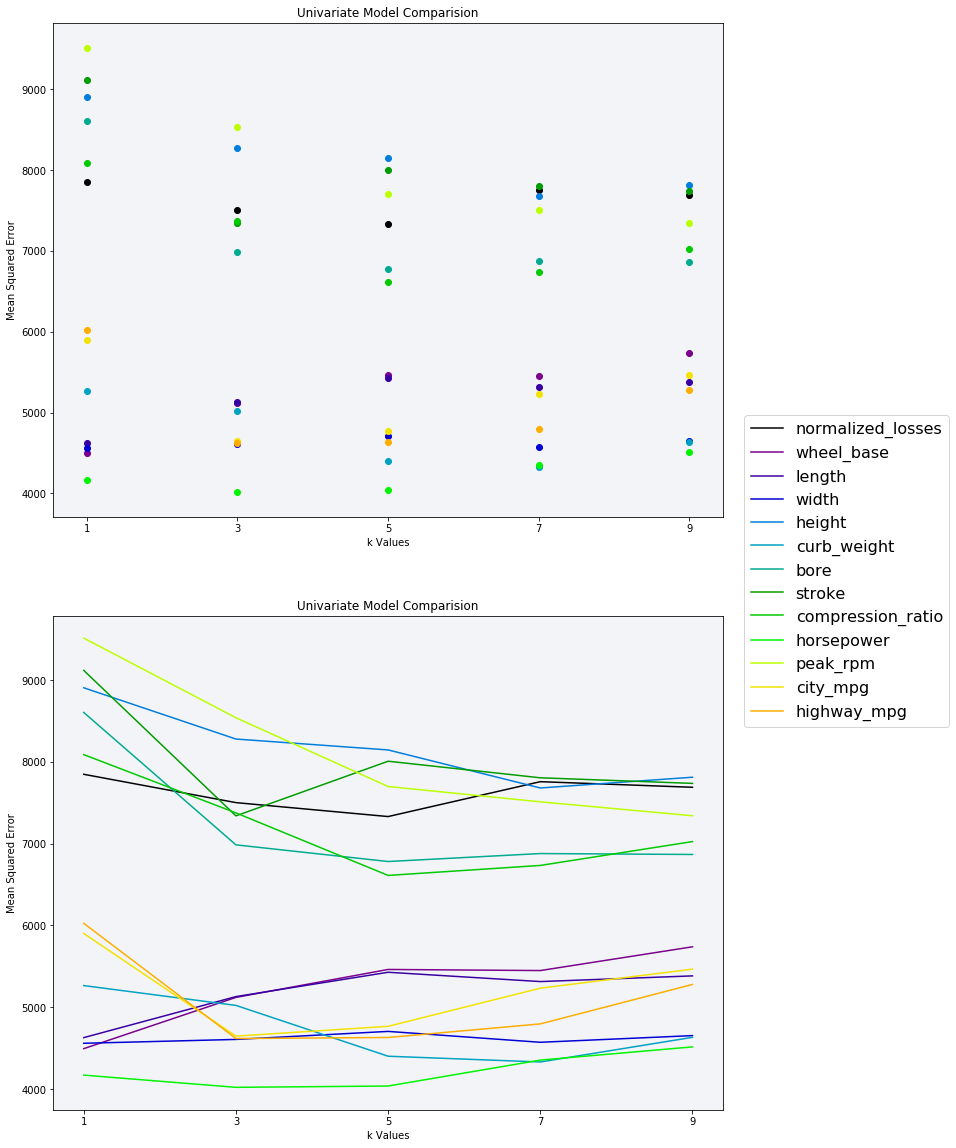

In [13]:
plot_RMSE_k_value_eval(training_features=training_features, k_values=[1,3,5,7,9],
            rmse_dict=rmse_univariate_k_eval, title='Univariate Model Comparision')

## <font color=blue>04 Mulitvariate Model</font>
*  Modify the __knn_train_test()__ function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
  *  Instead of using just a single column for train and test, use all of the columns passed in.
  *  Use a k value = 5 (we'll tune the k value in the next step).
*  Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
  *  *Note, I've decided to take this out to the best 8 training features.*
*  Display all of the RMSE values.

In [14]:
def multivariate_knn_train_test_eval_k(df, train_columns, predict_column, k_values):
    
    # Randomly resorts the DataFrame to mitiate sampling bias
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Split the DataFrame into ~50% train / 50% test data sets
    split_integer = round(len(df) * 0.50)
    train_df = df.iloc[0:split_integer]
    test_df = df.iloc[split_integer:]
    
    # Define the train_target data set 
    train_target = train_df[predict_column]
    
    # Loop through k values an obtain RMSE's for all k's and training cols
    
    rmse_dict = {}
    
    for col in train_columns:
        
        rmse_lst = []
        
        for k in k_values:

            # Define the train_features & test_features data sets 
            train_features = train_df[col]
            test_features = test_df[col]
    
            # instantiate KNeighborRegrssor object
            knn = KNeighborsRegressor(n_neighbors=k)
    
            # Fit the KNN model using the default k value.
            knn.fit(train_features, train_target)
    
            # Make predictions using model.
            predictions = knn.predict(test_features)
    
            # Calculate and append the root mean square error.
            mse = mean_squared_error(y_true=test_df[predict_column], y_pred=predictions)
            rmse_lst.append(np.sqrt(mse))
            
        rmse_dict[' - '.join(col)] = rmse_lst
    
    return rmse_dict

In [15]:
# Deterine the rmse when all the training features are used
all_features_rmse = multivariate_knn_train_test_eval_k(df=numeric_cars_normalized, 
            train_columns=[training_features], predict_column=predictive_feature, k_values=[5])

for k, v in all_features_rmse.items():
    print('RMSE when all featues are used RMSE:', v[0])

RMSE when all featues are used RMSE: 4163.85460618


In [16]:
# Rank the models by mean() RMSE values across the range of k values.
rmse_univariate_k_eval_series = rmse_univariate_k_eval_df.mean()
rmse_univariate_k_eval_series.sort_values(inplace=True)
rmse_univariate_k_eval_series

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [17]:
# Create list containing list of 2, 3 ... 8 best features
f = rmse_univariate_k_eval_series.index.tolist()
best_feature_combinations = [f[:x] for x in range(2,9)]
best_feature_combinations

[['horsepower', 'width'],
 ['horsepower', 'width', 'curb_weight'],
 ['horsepower', 'width', 'curb_weight', 'highway_mpg'],
 ['horsepower', 'width', 'curb_weight', 'highway_mpg', 'length'],
 ['horsepower', 'width', 'curb_weight', 'highway_mpg', 'length', 'city_mpg'],
 ['horsepower',
  'width',
  'curb_weight',
  'highway_mpg',
  'length',
  'city_mpg',
  'wheel_base'],
 ['horsepower',
  'width',
  'curb_weight',
  'highway_mpg',
  'length',
  'city_mpg',
  'wheel_base',
  'compression_ratio']]

In [18]:
# Optimize the k values for each of the 7 multi feature modles listed above
ks = [i for i in range(1, 26)]
top_seven_features_rmse = multivariate_knn_train_test_eval_k(df=numeric_cars_normalized, 
            train_columns=best_feature_combinations, predict_column=predictive_feature, k_values=ks)

rmse_multivariate_k_eval_df = pd.DataFrame(top_seven_features_rmse)

columns = rmse_multivariate_k_eval_df.columns.tolist()
rmse_multivariate_k_eval_df.head(5)

,horsepower - width,horsepower - width - curb_weight,horsepower - width - curb_weight - highway_mpg,horsepower - width - curb_weight - highway_mpg - length,horsepower - width - curb_weight - highway_mpg - length - city_mpg,horsepower - width - curb_weight - highway_mpg - length - city_mpg - wheel_base,horsepower - width - curb_weight - highway_mpg - length - city_mpg - wheel_base - compression_ratio
0,4061.961305,3013.010999,2600.746384,2773.899127,2711.806447,2939.455882,2970.998204
1,3497.499362,2813.285970,2725.432507,2936.079966,2983.298230,3171.000019,3182.184363
2,3402.869264,3171.585284,3108.858031,3152.341552,3147.787236,3347.664749,3339.655377
3,3587.004420,3182.313742,3217.313521,3488.578222,3403.616325,3551.328740,3766.843827
4,3589.313262,3305.940140,3358.691580,3665.546673,3628.261188,3724.768826,3975.403025


## <font color=blue>05 Hyperparameter Tuning</font>
*  For the top 3 models in the last step, vary the hyperparameter value from __1__ to __25__ and plot the resulting RMSE values.
*  Which __k__ value is optimal for each model? How different are the __k__ values and what do you think accounts for the differences?

In [19]:
# Rank the test features by mean rmse values
mean_rmse_multivariate = rmse_multivariate_k_eval_df.mean()
mean_rmse_multivariate.sort_values(inplace=True)
mean_rmse_multivariate

horsepower - width - curb_weight                                                                       4122.515288
horsepower - width - curb_weight - highway_mpg                                                         4149.081191
horsepower - width - curb_weight - highway_mpg - length                                                4169.078119
horsepower - width - curb_weight - highway_mpg - length - city_mpg                                     4190.436162
horsepower - width                                                                                     4297.513038
horsepower - width - curb_weight - highway_mpg - length - city_mpg - wheel_base                        4348.591695
horsepower - width - curb_weight - highway_mpg - length - city_mpg - wheel_base - compression_ratio    4491.489880
dtype: float64

In [20]:
# Display the optimized hyperparameter (k) for the top 3 models
# And create a dict for plotting in the next step

top_three_models = mean_rmse_multivariate.index.tolist()[:3]
min_rmse = rmse_multivariate_k_eval_df.min()
top_three_models_rmse = {}

print('**Optimal k-values for each model**\n')
for model in top_three_models:
    RMSE = min_rmse[model]
    k = rmse_multivariate_k_eval_df[rmse_multivariate_k_eval_df[model] == RMSE].index.tolist()
    k = k[0] + 1
    print(model)
    print('\tk-value:', k)
    print('\tRMSE:', RMSE)
    print('\n')
    
    top_three_models_rmse[model] = rmse_multivariate_k_eval_df[model].tolist()

**Optimal k-values for each model**

horsepower - width - curb_weight
	k-value: 2
	RMSE: 2813.28596983


horsepower - width - curb_weight - highway_mpg
	k-value: 1
	RMSE: 2600.74638373


horsepower - width - curb_weight - highway_mpg - length
	k-value: 1
	RMSE: 2773.89912692




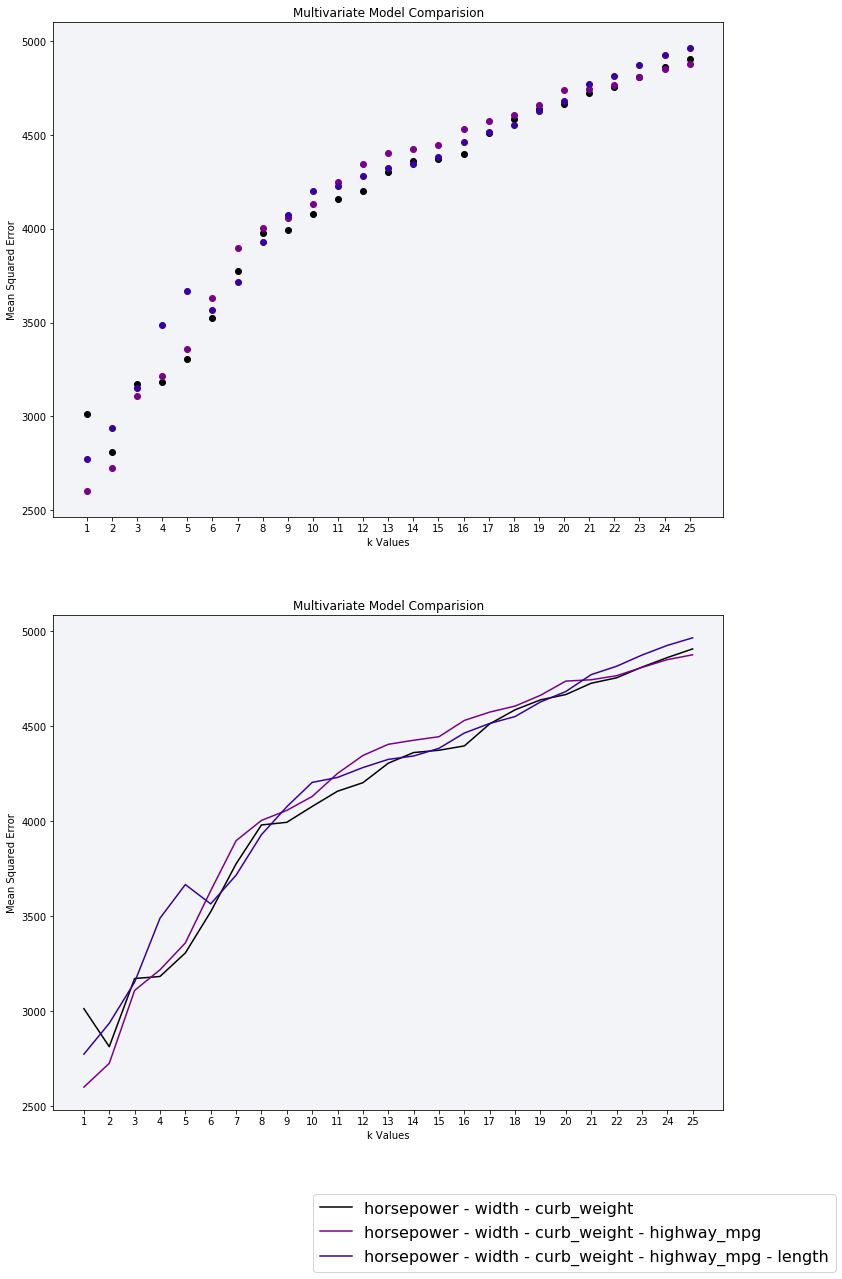

In [21]:
plot_RMSE_k_value_eval(training_features=top_three_models, k_values=ks,
            rmse_dict=top_three_models_rmse, title='Multivariate Model Comparision',
            legend_h_offset = 1.18, legend_v_offset=-0.25)

## <font color=blue>06 k-Fold Validation</font>
*  Create a new function called knn_kfold_validation(), it should apply a k nearest nieghbors fit with a k-fold cross validation instead of test/train validation.
*  Using the k-fold validation repeat the model optimization and see how your results compare to the test/train validation
  *  Find the top 8 univariate training features
  *  Then, determine which are the top three training combinations of features to build the price prediction model.
  *  Determine the optimal k value for each of the 3 top price prediction models.

In [22]:
def knn_kfold_validation(df, train_columns, predict_column, folds, k_value):
    # Instantiate the kFond class
    kf = KFold(n_splits=folds, shuffle=True, random_state=1)
    
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k_value)
    
    # Use the cross_val_score() function to perform k-fold cross-validation
    # This will calculate our mean squared error for each fold.
    mses = cross_val_score(estimator=knn, X=df[train_columns], y=df[predict_column],
            scoring="neg_mean_squared_error", cv=kf)
    
    # Take the absolute value and square root of the mses to get Root Mean Squared Error (RMSE)
    mses_abs_sqrt = np.sqrt(np.absolute(mses))
    
    # Return the mean of all the RMSE values
    # for the k-fold cross validation of the model
    mean_rmse = np.mean(mses_abs_sqrt)
    return mean_rmse

In [23]:
# In an effort to determine the optimal training features, each possible training
# feature will be evaluated with k values ranging from 1 - 25.

k_values = [k for k in range(1,26)]

# instantiate mse dict
rmse_k_fold = {}


for feature in training_features:
    # instantiate mse list
    mean_rmse = []
    
    for k_value in k_values:
        mean_rmse.append(knn_kfold_validation(df=numeric_cars_normalized, train_columns=[feature], 
                    predict_column=predictive_feature, folds=10, k_value=k_value))
        
    rmse_k_fold[feature] = mean_rmse

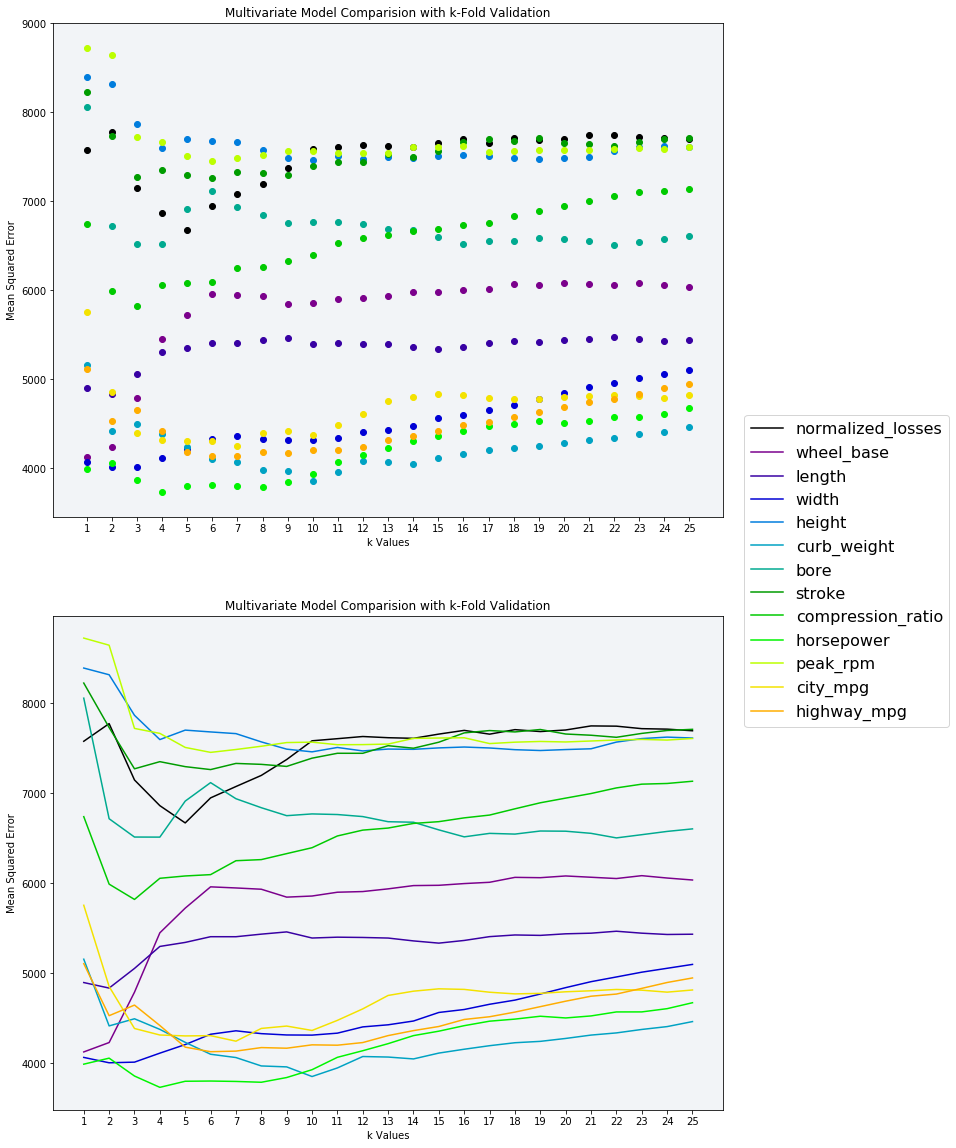

In [24]:
plot_RMSE_k_value_eval(training_features=training_features, k_values=k_values,
            rmse_dict=rmse_k_fold, title='Multivariate Model Comparision with k-Fold Validation')

In [25]:
# Rank the training features by mininum RMSE
rmse_k_fold_df = pd.DataFrame(data=rmse_k_fold)
min_rmse_by_feature = rmse_k_fold_df.min()
min_rmse_by_feature.sort_values(inplace=True)
print('\t-min rmse rankings-')
min_rmse_by_feature

	-min rmse rankings-


horsepower           3734.338728
curb_weight          3854.423917
width                4007.136578
wheel_base           4127.664023
highway_mpg          4130.257090
city_mpg             4247.140019
length               4837.140126
compression_ratio    5821.947865
bore                 6505.448116
normalized_losses    6671.869661
stroke               7264.390769
peak_rpm             7455.535073
height               7461.408715
dtype: float64

In [26]:
# Use the best 2, 3, ... 8 features from the mean ranking step to train and 
# test a multivariate k-nearest neighbors model using the default k value (5).
# Then display all of the RMSE values.

print('**Training Set Evalution using the min rankings**\n')

training_features_lst = []
RMSE = []
feature_count = []
for i, n in enumerate(range(2,9)):
    feature_count.append(n)
    training_features = min_rmse_by_feature.index[:n].tolist()
    training_features_lst.append(' - '.join(training_features))
    RMSE.append(knn_kfold_validation(df=numeric_cars_normalized, train_columns=training_features, 
                    predict_column=predictive_feature, folds=10, k_value=10))
    
                
min_ranking_eval_set = pd.DataFrame({'feature_cnt': feature_count, 'features': training_features_lst, 'RMSE': RMSE})
min_ranking_eval_set.sort_values('RMSE', inplace=True)
min_ranking_eval_set

**Training Set Evalution using the min rankings**



,RMSE,feature_cnt,features
1,3265.309896,3,horsepower - curb_weight - width
0,3418.902452,2,horsepower - curb_weight
2,3766.670507,4,horsepower - curb_weight - width - wheel_base
4,3784.966643,6,horsepower - curb_weight - width - wheel_base ...
5,3791.335778,7,horsepower - curb_weight - width - wheel_base ...
3,3819.457879,5,horsepower - curb_weight - width - wheel_base ...
6,3965.200668,8,horsepower - curb_weight - width - wheel_base ...


In [27]:
# Optimize the hyperparameter (k) for the top 3 models

rmse_dict_top_models = {}
k_values = [k for k in range(1,51)]

for n in range(3):
    feature_cnt = min_ranking_eval_set.iloc[n]['feature_cnt']
    model = training_features[:feature_cnt]
    
    # instantiate rmse list
    rmse = []
    
    for k_value in k_values:
        rmse.append(knn_kfold_validation(df=numeric_cars_normalized, train_columns=model, 
                    predict_column=predictive_feature, folds=10, k_value=k_value))
    
    rmse_dict_top_models[' - '.join(model)] =rmse

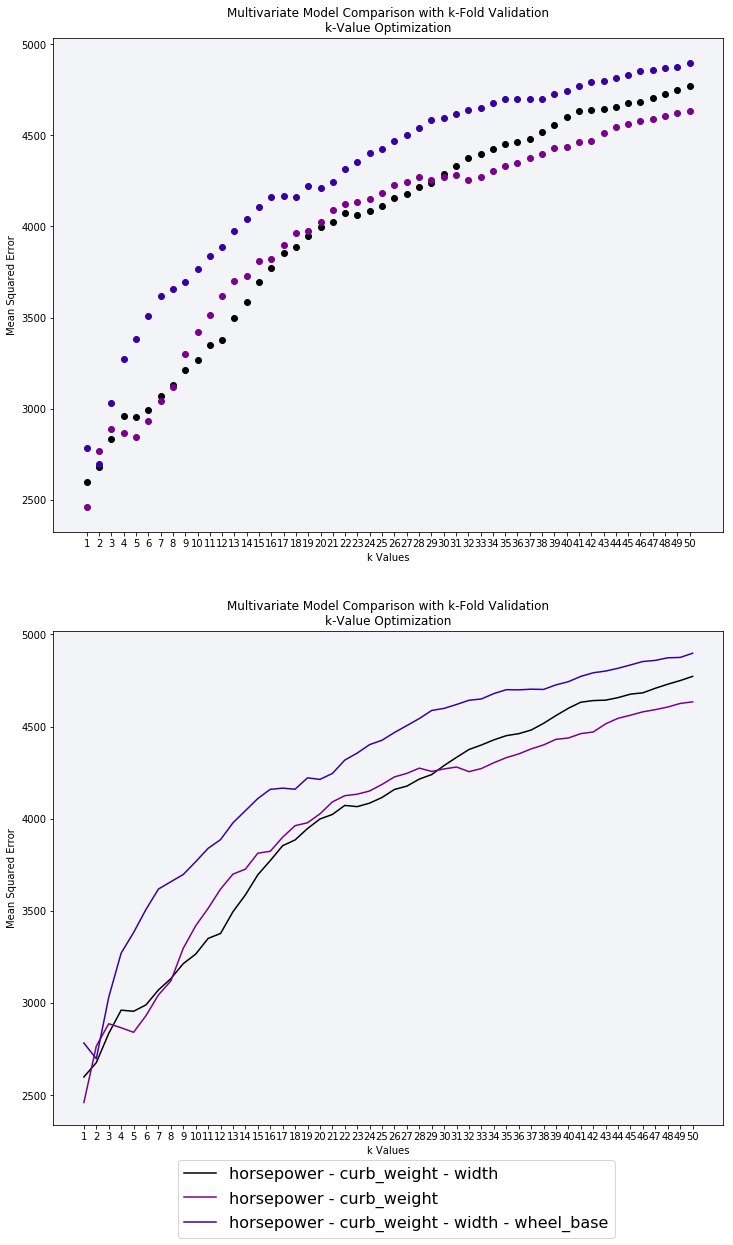

In [28]:
# Plot the k values versus RMSE to visualize which model works best 
# and at what k value

plot_RMSE_k_value_eval(training_features=rmse_dict_top_models.keys(), k_values=k_values,
            rmse_dict=rmse_dict_top_models, title='Multivariate Model Comparison with k-Fold Validation\nk-Value Optimization',
            legend_h_offset = 0.85, legend_v_offset=-0.15)

In [29]:
# Display the optimal k value for each model and the RMSE value

rmse_df = pd.DataFrame(data=rmse_dict_top_models)
rmse_df['k_value'] = k_values
rmse_df.set_index('k_value', inplace=True)
optimal_ks = pd.DataFrame({'min': rmse_df.min(), 'idxmin': rmse_df.idxmin()})
optimal_ks


,idxmin,min
horsepower - curb_weight,1,2460.153314
horsepower - curb_weight - width,1,2598.753168
horsepower - curb_weight - width - wheel_base,2,2697.468652


In [30]:
# Optimize the number of folds for the 3 best models using each
# models optimal k value

models = [['horsepower', 'curb_weight', 'width'], ['horsepower', 'curb_weight'], 
          ['horsepower', 'curb_weight', 'width', 'wheel_base']]
k_values = [1,1,2]
flds = [f for f in range(5,71)]
rmse_optimized_models = {}

for i ,model in enumerate(models):
    
    # instantiate rmse list
    rmse = []
    
    for f in flds:
        rmse.append(knn_kfold_validation(df=numeric_cars_normalized, train_columns=model, 
                    predict_column=predictive_feature, folds=f, k_value=k_values[i]))
    
    rmse_optimized_models[' - '.join(model)] = rmse

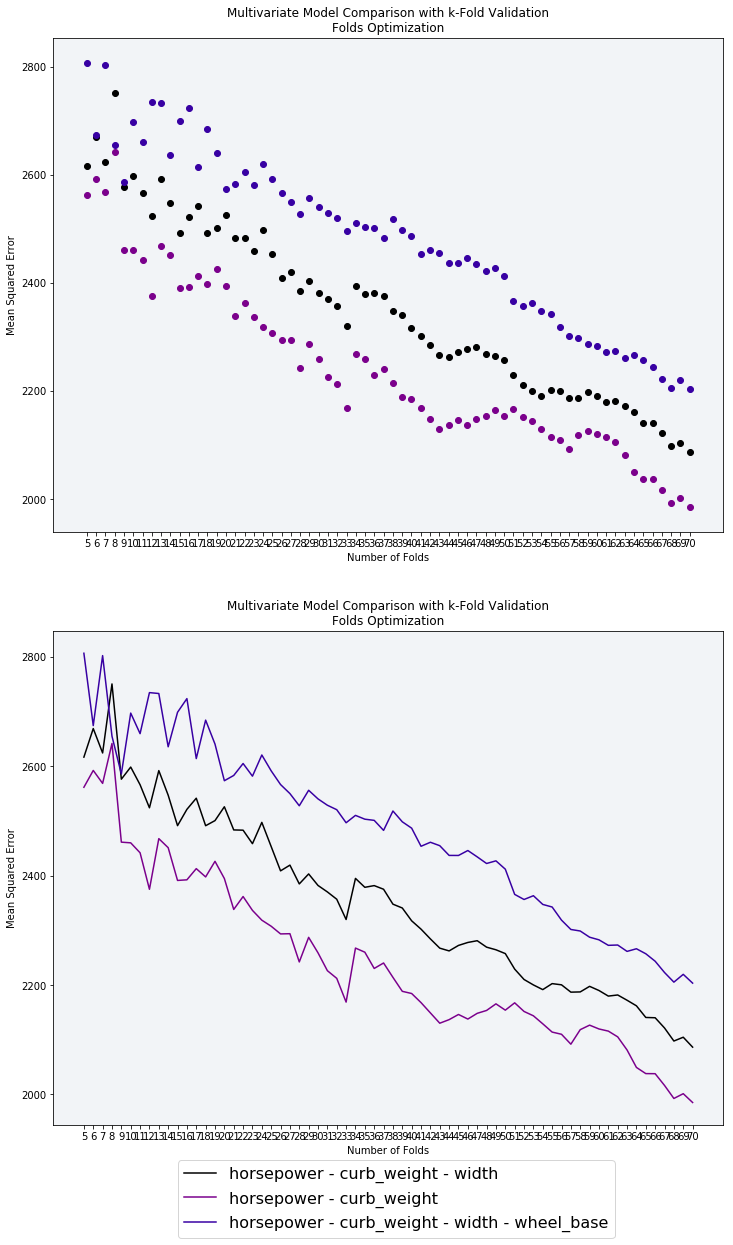

In [31]:
# Plot the folds versus RMSE to visualize which model works best 
# and at what number of folds

plot_RMSE_k_value_eval(training_features=rmse_optimized_models.keys(), k_values=flds,
            rmse_dict=rmse_optimized_models, title='Multivariate Model Comparison with k-Fold Validation\nFolds Optimization',
            legend_h_offset = 0.85, legend_v_offset=-0.15, x_axis_title='Number of Folds')

#### Observation...
It seems that with a large number of folds the RMSE value continues to fall, however, processing time is going to become prohibitive.  Using the number of folds I have used above is unrealistic with large data sets.